# 프로젝트 1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## (1) 데이터 가져오기
- ``sklearn.datasets``의 ``load_diabetes``에서 데이터를 가져와주세요.
- ``diabetes``의 ``data``를 ``df_X``에, ``target``을 ``df_y``에 저장해주세요.



In [1]:
from sklearn.datasets import load_diabetes

df_X, df_y = load_diabetes(return_X_y=True)

## (2) 모델에 입력할 데이터 X 준비하기
- `df_X`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## (3) 모델에 입력할 데이터 y 준비하기
- `df_y`에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## (4) train 데이터와 test 데이터로 분리하기
- `X`와 `y` 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 `W`와 `b`를 준비해주세요.
- 모델 함수를 구현해주세요.

In [5]:
import numpy as np

W = np.random.rand(X_train.shape[1])
b = np.random.rand()

def model(X, W, b):
  pred = np.dot(X, W) + b
  return pred

## (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [6]:
def MSE(a, b):
  mse = ((a-b)**2).mean()
  return mse

def loss(X, W, b, y):
  pred = model(X, W, b)
  L = MSE(pred, y)
  return L

## (7) 기울기를 구하는 `gradient` 함수 구현하기
- 기울기를 계산하는 `gradient` 함수를 구현해주세요.

In [7]:
def gradient(X, W, b, y):
  N = len(y)
  pred = model(X, W, b)
  error = (pred - y)
  dW = 1/N * 2 * np.dot(X.T, error)
  db = 2 * error.mean()
  return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요.
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [8]:
LR = 0.5

## (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 `X`에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [9]:
for i in range(1,10001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LR * dW
  b -= LR * db
  L = loss(X_train, W, b, y_train)
  if i % 100 == 0:
    print(f'Iteration {i} : Loss {L.round(2)}')

Iteration 100 : Loss 3865.65
Iteration 200 : Loss 3367.42
Iteration 300 : Loss 3170.93
Iteration 400 : Loss 3064.3
Iteration 500 : Loss 2998.4
Iteration 600 : Loss 2955.85
Iteration 700 : Loss 2927.9
Iteration 800 : Loss 2909.35
Iteration 900 : Loss 2896.92
Iteration 1000 : Loss 2888.54
Iteration 1100 : Loss 2882.83
Iteration 1200 : Loss 2878.9
Iteration 1300 : Loss 2876.18
Iteration 1400 : Loss 2874.27
Iteration 1500 : Loss 2872.91
Iteration 1600 : Loss 2871.94
Iteration 1700 : Loss 2871.22
Iteration 1800 : Loss 2870.69
Iteration 1900 : Loss 2870.28
Iteration 2000 : Loss 2869.97
Iteration 2100 : Loss 2869.72
Iteration 2200 : Loss 2869.52
Iteration 2300 : Loss 2869.35
Iteration 2400 : Loss 2869.2
Iteration 2500 : Loss 2869.07
Iteration 2600 : Loss 2868.96
Iteration 2700 : Loss 2868.86
Iteration 2800 : Loss 2868.76
Iteration 2900 : Loss 2868.67
Iteration 3000 : Loss 2868.58
Iteration 3100 : Loss 2868.5
Iteration 3200 : Loss 2868.42
Iteration 3300 : Loss 2868.34
Iteration 3400 : Loss 286

## (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [10]:
pred = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2937.7465453545024

## (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [11]:
import matplotlib.pyplot as plt

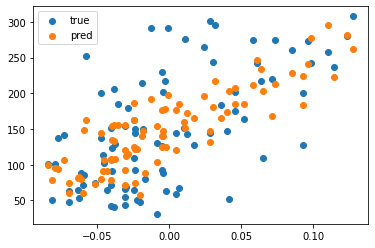

In [12]:
plt.scatter(X_test[:, 2], y_test, label='true')
plt.scatter(X_test[:, 2], pred, label='pred')
plt.legend()
plt.show()